# Gradient Boosting Machines GBM
* AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.
* Artıklar(gerçek değerler ile tahmin edilen değerler arasında ki farklar ) üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
* 2001 Friedman
----
* Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
* sSeri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının(residuals) üzerine kurularak(fit) oluşturulur.
* GBM diferansiyellenebilen herhangi bir kayıp(loss) fonksiyonunu optimize edebilen Gradient Desccent algoritmasını kullanmakta.(GBM'i gbm yapan özellik)
* GB bir çok temel öğrenici tipi (base learner type) kullanabilir.(Trees,linear terms,splines,...)
* Cost fonkisyonları ve link fonksiyonları modifiye edilebilirdir.
* Boosting + Gradient descent
------------
### Boosting yöntemlerine giriş
* Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır. (Kearns ve Valiant 1990)
* kötü tahmin, Gerçek değerler ile tahmin edilen değerlerin farkının karelerinin alınması sonucunda ortaya çıkan büyük değer (MSE). Kötü tahminde bulunan ağaçlara da zayıf tahminciler denir.
--------------
### Adaptive Boosting (1996-1999) AdaBoost
* Zayıf sınıflandırıcıların(classification problemleri için denemişler) bir araya gelerek güçlü bir oluşturması fikrini hayata geçiren Algoritmalardır. Son eklemeli gibi düşünülebilir.
-----------------

libraray

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler ## standartlaStırma
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
y= df['Salary']
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) ## one hot encoding
X_= df.drop(['Salary', 'League', 'Division','NewLeague'], axis =1).astype('float64')
X= pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### model ve tahmin

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [9]:
y_pred = gbm_model.predict(X_test)

In [8]:
?GradientBoostingRegressor

Init signature:
GradientBoostingRegressor(
    *,
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`sklearn.ensemble.HistGradientBoostingRegressor` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`Us

In [11]:
# ilkel hatamız
np.sqrt(mean_squared_error(y_test,y_pred))  

350.0093894492151

model tuning

* criterion : bölünmelerle ilgili saflık ölçüsü
* learning_rate: ağaçların katkısı ile ilgili göz önünde bulundurulan bir değer
* loss: kayıp fonksiyonu, bazen cost olarak çıkar   'robust dayanıklı demekti(aykırı gözlemlere karşı.)'
* max_features
* n_estimators
* subsample : oluşturulacak olan ağaçları oluştururken göz önünde bulundurulacak oran
-------
 for loos some {'squared_error', 'absolute_error', 'huber', 'quantile'}

In [15]:
import inspect
import collections
inspect.signature(GradientBoostingRegressor)

<Signature (*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)>

In [16]:
gbm_params= {'learning_rate' : [0.001,0.1,0.01],
            'max_depth' : [3,5,8,10],
            'n_estimators' : [100,200,500,1000],
            'subsample' : [1,0.5,0.8],
            'loss' : ['squared_error','absolute_error','huber','quantile'] }

In [17]:
gbm_cv_model= GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


In [18]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'absolute_error',
 'max_depth': 3,
 'n_estimators': 1000,
 'subsample': 0.5}

In [19]:
gbm_model_tuned = GradientBoostingRegressor(learning_rate=0.01,loss= 'absolute_error', max_depth=3 ,n_estimators= 1000, subsample=0.5).fit(X_train,y_train)
y_pred= gbm_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

315.3449929017127

# değişken önem düzeyi

In [20]:
Importance = pd.DataFrame({'Importance': gbm_model_tuned.feature_importances_*100},
                         index= X_train.columns)

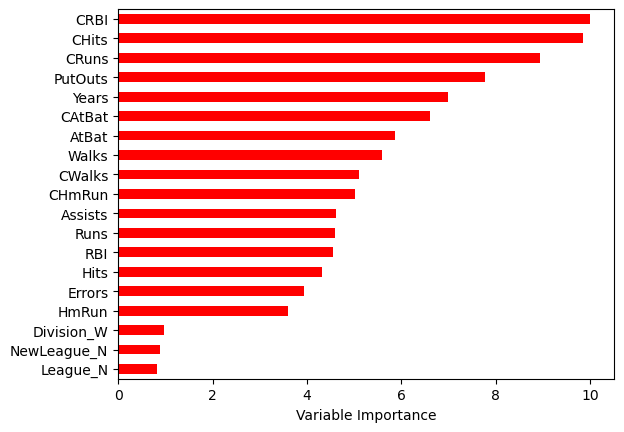

C:\Users\ycanf\anaconda3\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\ycanf\AppData\Local\Temp\joblib_memmapping_folder_1888_efaa84b71c644ced8422b37e3c6ad15b_6d431ecddc124c0783574c0b0841353c
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\ycanf\anaconda3\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\ycanf\AppData\Local\Temp\joblib_memmapping_folder_1888_efaa84b71c644ced8422b37e3c6ad15b_40c3254f511e4c95aa4f628d07326b1a
  warnings.warn("Failed to delete temporary folder: {}"


In [34]:
Importance.sort_values(by = 'Importance', axis = 0 , ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [25]:
gbm_model_tuned.feature_importances_*100

array([ 5.86141353,  4.32251058,  3.59488159,  4.5849566 ,  4.55157582,
        5.57909803,  6.98254942,  6.61501666,  9.83943806,  5.00727323,
        8.93188501, 10.00533385,  5.10570429,  7.76594432,  4.62295354,
        3.93314061,  0.82732859,  0.98026126,  0.88873502])